In [1]:
import pandas as pd

parking_dataset=pd.read_csv('smart_parking.csv')
parking_dataset.head()

,Timestamp,ParkingSpaceID,OccupancyStatus,VehicleType
0,2023-05-03,82,Empty,Motorcycle
1,2023-03-12,19,Empty,Bicycle
2,2023-03-31,19,Empty,Motorcycle
3,2023-01-08,72,Occupied,Motorcycle
4,2023-05-27,77,Occupied,Bicycle


In [2]:
parking_dataset.dropna(inplace=True)

In [3]:
# Assuming the 'Timestamp' column is of type datetime, if not, convert it
parking_dataset['Timestamp'] = pd.to_datetime(parking_dataset['Timestamp'])

# Check for missing values
missing_values = parking_dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

# Summary statistics
summary_stats = parking_dataset.describe(include='all')
print("\nSummary Statistics:")
print(summary_stats)

Missing Values:
Timestamp          0
ParkingSpaceID     0
OccupancyStatus    0
VehicleType        0
dtype: int64

Summary Statistics:
                  Timestamp  ParkingSpaceID OccupancyStatus VehicleType
count                   500      500.000000             500         500
unique                  261             NaN               3           3
top     2023-01-24 00:00:00             NaN        Reserved     Bicycle
freq                      6             NaN             173         180
first   2023-01-02 00:00:00             NaN             NaN         NaN
last    2023-12-23 00:00:00             NaN             NaN         NaN
mean                    NaN       52.248000             NaN         NaN
std                     NaN       28.923063             NaN         NaN
min                     NaN        1.000000             NaN         NaN
25%                     NaN       28.750000             NaN         NaN
50%                     NaN       54.000000             NaN         NaN
75

<ipython-input-3-93674d979693>:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_stats = parking_dataset.describe(include='all')


In [4]:
# EDA: Distribution of Occupancy Status
occupancy_distribution = parking_dataset['OccupancyStatus'].value_counts()
print("\nOccupancy Status Distribution:")
print(occupancy_distribution)

# EDA: Distribution of Vehicle Types
vehicle_distribution = parking_dataset['VehicleType'].value_counts()
print("\nVehicle Type Distribution:")
print(vehicle_distribution)


Occupancy Status Distribution:
Reserved    173
Empty       167
Occupied    160
Name: OccupancyStatus, dtype: int64

Vehicle Type Distribution:
Bicycle       180
Car           162
Motorcycle    158
Name: VehicleType, dtype: int64


In [5]:
# EDA: Number of unique parking spaces
unique_parking_spaces = parking_dataset['ParkingSpaceID'].nunique()
print("\nNumber of Unique Parking Spaces:", unique_parking_spaces)

# EDA: Time range of the dataset
start_date = parking_dataset['Timestamp'].min()
end_date = parking_dataset['Timestamp'].max()
print("\nDataset Time Range:", start_date, "to", end_date)



Number of Unique Parking Spaces: 100

Dataset Time Range: 2023-01-02 00:00:00 to 2023-12-23 00:00:00


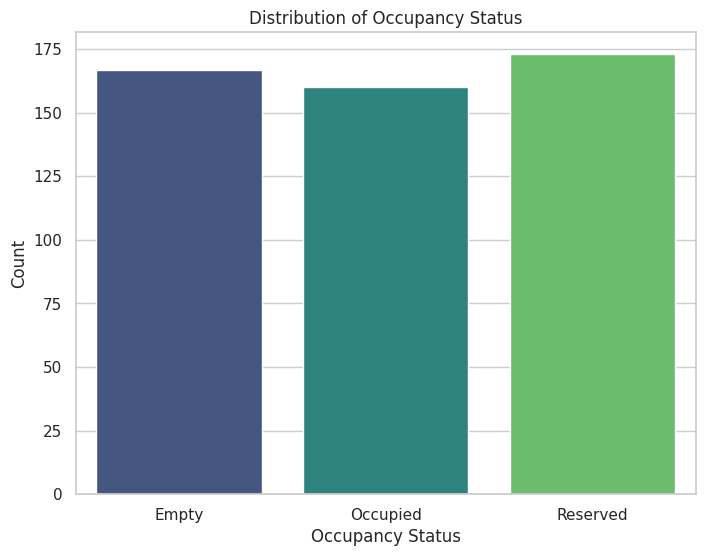

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set(style="whitegrid")

# Distribution of Occupancy Status
plt.figure(figsize=(8, 6))
sns.countplot(x='OccupancyStatus', data=parking_dataset, palette='viridis')
plt.title('Distribution of Occupancy Status')
plt.xlabel('Occupancy Status')
plt.ylabel('Count')
plt.show()

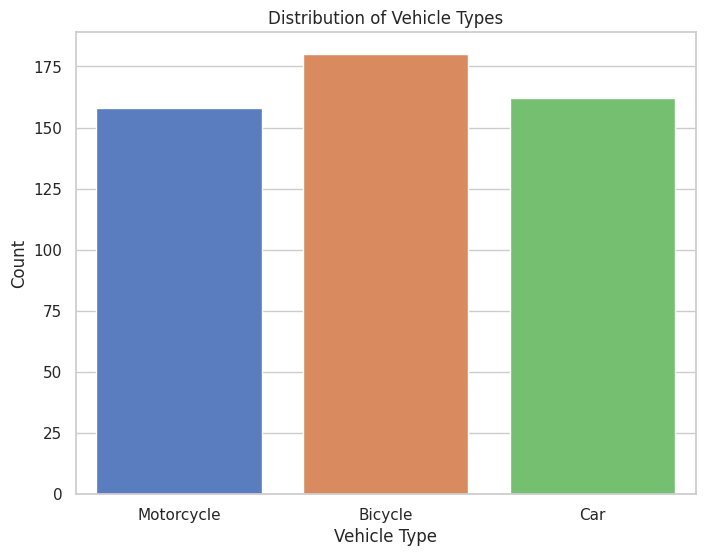

In [7]:
# Distribution of Vehicle Types
plt.figure(figsize=(8, 6))
sns.countplot(x='VehicleType', data=parking_dataset, palette='muted')
plt.title('Distribution of Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

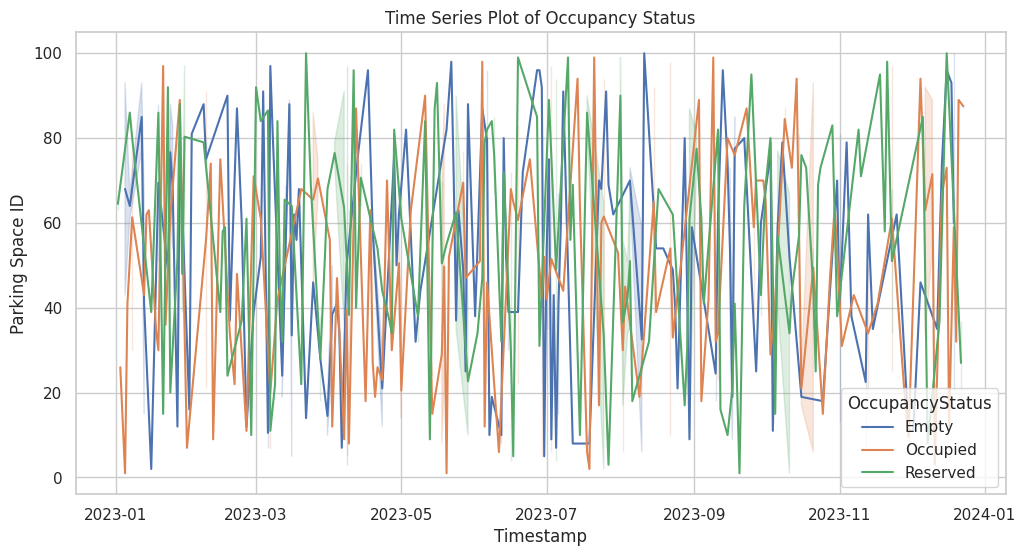

In [8]:
# Time Series Plot of Occupancy Status
plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='ParkingSpaceID', hue='OccupancyStatus', data=parking_dataset)
plt.title('Time Series Plot of Occupancy Status')
plt.xlabel('Timestamp')
plt.ylabel('Parking Space ID')
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoder = LabelEncoder()
parking_dataset['OccupancyStatus'] = label_encoder.fit_transform(parking_dataset['OccupancyStatus'])
parking_dataset['VehicleType'] = label_encoder.fit_transform(parking_dataset['VehicleType'])

# Features and target variable
X = parking_dataset[['ParkingSpaceID', 'VehicleType']]
y = parking_dataset['OccupancyStatus']
X

,ParkingSpaceID,VehicleType
0,82,2
1,19,0
2,19,2
3,72,2
4,77,0
...,...,...
495,10,0
496,76,1
497,74,1
498,33,1


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,ParkingSpaceID,VehicleType
249,9,0
433,46,0
19,16,2
322,15,2
332,6,1
...,...,...
106,52,0
270,37,2
348,30,0
435,5,2


In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model with scaled features
svm_classifier_scaled = SVC(kernel='linear', random_state=42)
svm_classifier_scaled.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_svm_scaled = svm_classifier_scaled.predict(X_test_scaled)

# Evaluate the scaled SVM model
accuracy_svm_scaled = accuracy_score(y_test, y_pred_svm_scaled)
print(f"Accuracy (Scaled SVM): {accuracy_svm_scaled:.2f}")

Accuracy (Scaled SVM): 0.29


#### Time series

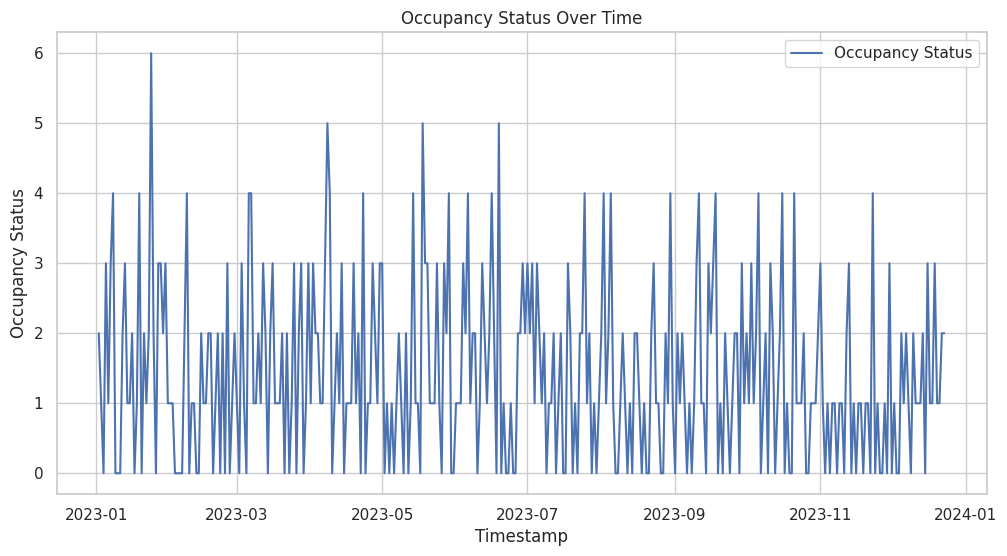

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from datetime import timedelta

# Load the dataset
df = pd.read_csv('smart_parking.csv')

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set 'Timestamp' as the index
df.set_index('Timestamp', inplace=True)

# Resample the data to daily frequency (assuming data is not already daily)
df_daily = df.resample('D').count()

# Fill missing values (if any)
df_daily = df_daily.fillna(0)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['OccupancyStatus'], label='Occupancy Status')
plt.title('Occupancy Status Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Occupancy Status')
plt.legend()
plt.show()


Mean Squared Error: 1.2372021615649986


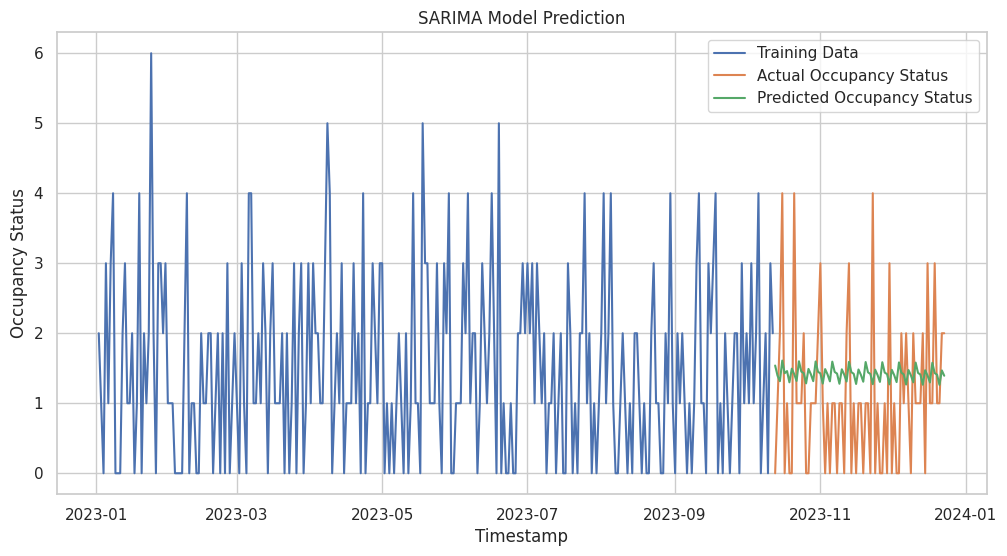

In [13]:
# Split the data into training and testing sets
train_size = int(len(df_daily) * 0.8)
train, test = df_daily.iloc[:train_size], df_daily.iloc[train_size:]

# Train the SARIMA model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)
model = SARIMAX(train['OccupancyStatus'], order=order, seasonal_order=seasonal_order)
results = model.fit(disp=False)

# Make predictions on the test set
start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start=start, end=end, dynamic=False)

# Evaluate the model
mse = mean_squared_error(test['OccupancyStatus'], predictions)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['OccupancyStatus'], label='Training Data')
plt.plot(test.index, test['OccupancyStatus'], label='Actual Occupancy Status')
plt.plot(test.index, predictions, label='Predicted Occupancy Status')
plt.title('SARIMA Model Prediction')
plt.xlabel('Timestamp')
plt.ylabel('Occupancy Status')
plt.legend()
plt.show()
